# LIVRIA : Visualisation des données du set de Goodbook-10k

### Import des librairies et des données

In [1]:
# On commence par importer les librairies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Puis on lit les fichiers csv qu'on souhaite visualiser
ratings = pd.read_csv( 'data/ratings1.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books1.csv' )
tags = pd.read_csv( 'data/tags.csv' )
btags = pd.read_csv( 'data/book_tags.csv')

### Nettoyage des données


Avant de commencer à examiner les données et à les exploiter, il faut s'assurer qu'elles sont exploitables. Il ne faut pas que le set contienne plusieurs notes pour un même livre attribué par un utilisateur en particulier. S'il y a des doublons, nous devons les enlever. 

In [2]:
print("Nombre de notes avant d'enlever les doublons : " + str(len(ratings))) 
# On commence par enlever les combinaisons utilisateur/livre dupliquées
clean_ratings = ratings.drop_duplicates(subset=['user_id', 'book_id'], keep=False) # On garde la dernière note attribuée
print("Nombre de notes après nettoyage : " + str(len(clean_ratings))) 

Nombre de notes avant d'enlever les doublons : 5976479
Nombre de notes après nettoyage : 5976479


Il semble que le set ne contenait pas de doublons. Une bonne chose de vérifiée ! 

### Visualisation des notes 

In [3]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


A savoir que les notes sont classées chronologiquement des plus anciennes aux plus récentes.

In [4]:
print('Nombre de notes attribuées : '+ str(len(ratings)))

Nombre de notes attribuées : 5976479


In [5]:
# Description statistique
df_notes=pd.DataFrame(ratings['rating'])
df_notes.describe()

,rating
count,5.976479e+06
mean,3.919866e+00
std,9.910868e-01
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


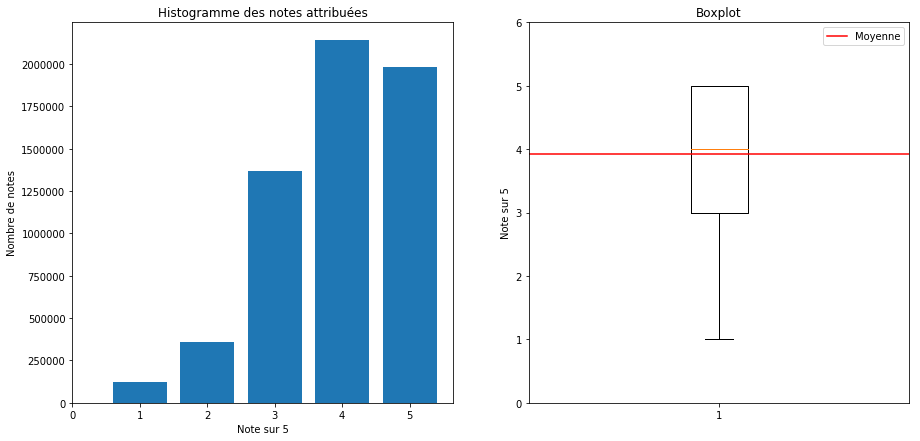

In [6]:
# Vecteur de données des notes
notes=np.array(ratings['rating'])
# Histogramme
plt.subplot(1, 2, 1)
axes = plt.gca()
bins = [notes - 0.5 for notes in range(1, 7)]
plt.hist(notes, bins = bins, rwidth = 0.8)
axes.xaxis.set_ticks(range(6))
plt.xlabel('Note sur 5')
plt.ylabel('Nombre de notes')
plt.title('Histogramme des notes attribuées')
plt.gcf().set_size_inches(15, 7)
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(notes)
plt.axhline(y=3.919866,color="red", label="Moyenne")
plt.ylim(0, 6)
plt.title('Boxplot')
plt.ylabel('Note sur 5')
plt.legend(loc="best")
plt.gcf().set_size_inches(15, 7)
plt.show()

On peut voir que 4, qui est la note moyenne et la note médianne, est aussi la note la plus souvent donnée, suivie de peu 5 puis de 3. Les notes en dessous, c'est-à-dire 2 et 1, ont beaucoup moins été attribuées.

On cherche maintenant à montrer combien de fois chaque livre a été noté et combien de livres chaque utilisateur a notés.

In [17]:
nbNotesLivre = pd.value_counts(ratings['book_id'])
nbLivresIndiv = pd.value_counts(ratings['user_id'])
print('\nStatistiques descriptives pour le nombre de notes par livre :') 
pd.DataFrame(nbNotesLivre).describe()


Statistiques descriptives pour le nombre de notes par livre :


,book_id
count,10000.000000
mean,597.647900
std,1267.289788
min,8.000000
25%,155.000000
50%,248.000000
75%,503.000000
max,22806.000000


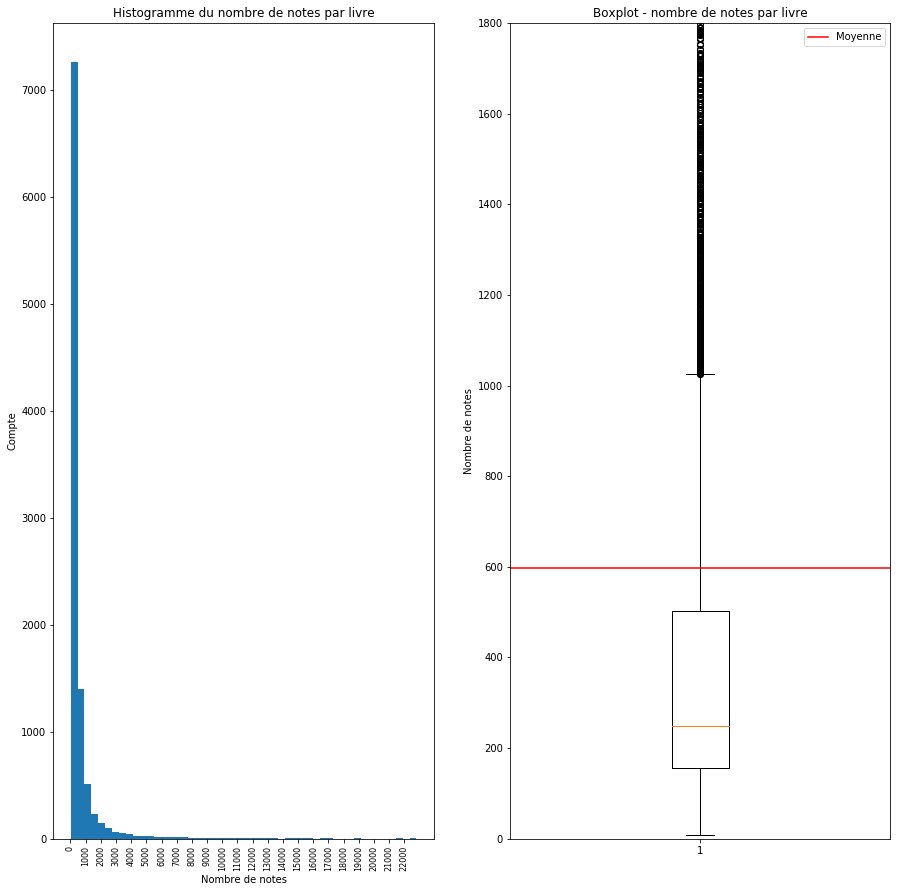

In [28]:
# Histogramme
plt.subplot(1, 2, 1)
axes = plt.gca()
#bins = [notes - 0.5 for notes in range(1, 7)]
plt.hist(nbNotesLivre, bins=50) #bins = bins, rwidth = 0.8)
axes.xaxis.set_ticks(np.arange(0, 23000, step=1000))
axes.xaxis.set_ticklabels(np.arange(0, 23000, step=1000), fontsize = 8, rotation = 90)
plt.xlabel('Nombre de notes')
plt.ylabel('Compte')
plt.title('Histogramme du nombre de notes par livre')
plt.gcf().set_size_inches(15, 15)
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(nbNotesLivre)
plt.axhline(y=597.647900,color="red", label="Moyenne")
plt.ylim(0, 1800)
plt.title('Boxplot - nombre de notes par livre')
plt.ylabel('Nombre de notes')
plt.legend(loc="best")
plt.gcf().set_size_inches(15, 15)
plt.show()

In [22]:
print('\n \nStatistiques descriptives pour le nombre de notes par utilisateur :')
pd.DataFrame(nbLivresIndiv).describe()


 
Statistiques descriptives pour le nombre de notes par utilisateur :


,user_id
count,53424.000000
mean,111.868804
std,26.071224
min,19.000000
25%,96.000000
50%,111.000000
75%,128.000000
max,200.000000


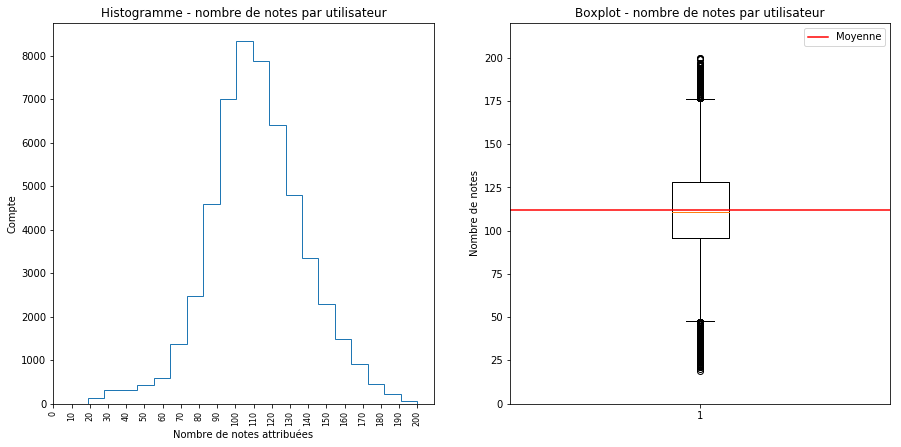

In [36]:
# Histogramme
plt.subplot(1, 2, 1)
axes = plt.gca()
# bins = [notes - 0.5 for notes in range(1, 7)]
plt.hist(nbLivresIndiv, bins=20, rwidth = 0.99, histtype = 'step')#, bins = bins, rwidth = 0.8)
axes.xaxis.set_ticks(np.arange(0, 210, step=10))
axes.xaxis.set_ticklabels(np.arange(0, 210, step=10), fontsize = 8, rotation = 90)
plt.xlabel('Nombre de notes attribuées')
plt.ylabel('Compte')
plt.title('Histogramme - nombre de notes par utilisateur')
plt.gcf().set_size_inches(15, 7)
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(nbLivresIndiv)
plt.axhline(y=111.868804,color="red", label="Moyenne")
plt.ylim(0, 220)
plt.title('Boxplot - nombre de notes par utilisateur')
plt.ylabel('Nombre de notes')
plt.legend(loc="best")
plt.gcf().set_size_inches(15, 7)
plt.show()

Il serait intéressant de voir la distibution des notes moyennes par utilisateur :

### Livres à lire
Voici les livres compris dans le fichier "to_read.csv".


In [10]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [11]:
print("Nombre d'ajouts dans la catégorie 'à lire': " +str(len(to_read))+ ", soit environ 1 million") 

Nombre d'ajouts dans la catégorie 'à lire': 912705, soit environ 1 million


La quasi-totalité des livres ont été au moins une fois ajoutés à cette catégorie par l'un des utilisateurs, et la majorité de des utilisateurs ont des livres ajoutés à cette catégorie.

In [12]:
print('Nombre de livres différents ajoutés dans cette catégorie : ' + str(len(to_read.book_id.unique()))+' sur 10k')

Nombre de livres différents ajoutés dans cette catégorie : 9986 sur 10k


In [13]:
print("Nombre d'utilisateurs qui en ont ajouté au moins un : "+ str(len(to_read.user_id.unique())))

Nombre d'utilisateurs qui en ont ajouté au moins un : 48871


### Books

In [14]:
b.head()

NameError: name 'b' is not defined

Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [ ]:
len(b)

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [ ]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

In [ ]:
reviews_per_book.sort_values().head( 10 )

### Reviews per user

All users have at least 19 reviews.

In [ ]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

In [ ]:
reviews_per_user.sort_values().head( 10 )

### Tags

In [ ]:
t.head()

In [ ]:
len(t)

In [ ]:
bt.head()

Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [ ]:
len(bt)

Let us merge tag names into tag applications.

In [ ]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [ ]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [ ]:
bt['count'].describe()

In [ ]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [ ]:
bt.sample( 10, weights = 'count')

These are the most popular tags:

In [ ]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )